In [11]:
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import cross_val_score
import graphviz
import numpy as np
import pandas as pd
import pydotplus
import scipy.stats as stats
import timeit

In [12]:
df = pd.read_csv('Student_Data.csv',encoding='Latin-1') #how we choose the encoding?
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


SOURCE: Elaf Abu Amrieh, Thair Hamtini, and Ibrahim Aljarah, The University of Jordan, Amman, Jordan, http://www.Ibrahimaljarah.com www.ju.edu.jo

In [14]:
#Subsetted variables of interest. 
df = df[['gender','Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'StudentAbsenceDays']]
df.head()

,gender,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,Father,15,16,2,20,Under-7
1,M,Father,20,20,3,25,Under-7
2,M,Father,10,7,0,30,Above-7
3,M,Father,30,25,5,35,Above-7
4,M,Father,40,50,12,50,Above-7


* Gender - student's gender (nominal: 'Male' or 'Female’)
* Relation - Parent responsible for student (nominal:’mom’,’father’)
* Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)
* Visited resources- how many times the student visits a course content(numeric:0-100)
* Viewing announcements-how many times the student checks the new announcements(numeric:0-100)
* Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
* Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

In [ ]:
df['Relation'] = df['Relation'].map({'Father': 1, 'Mum': 0})
df['StudentAbsenceDays'] = df['StudentAbsenceDays'].map({'Under-7': 1, 'Above-7': 0})
df.head()

## OUTCOME VARIABLE
* Gender

## CATEGORICAL  VARIABLES
* Gender
* Relation
* Student Absence Days

## CONTINUOUS VARIABLES:
* raisedhands
* Visited resource
* Viewing announcements
* Discussion groups

There are many variables in the original dataset - I'm just focusing on these 7 for this challenge.

In [16]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    X = df.drop('gender',1)
    Y = df['gender']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 61.51%.

Depth: 2
Model Performance: 56.57%.

Depth: 3
Model Performance: 58.27%.

Depth: 4
Model Performance: 58.52%.

Depth: 5
Model Performance: 59.16%.

Depth: 6
Model Performance: 56.01%.

Depth: 7
Model Performance: 58.82%.

Depth: 8
Model Performance: 57.14%.

Depth: 9
Model Performance: 56.26%.

Depth: 10
Model Performance: 56.67%.

--- Runtime: 22.26653628733993 seconds. ---


# Best-Performing Tree: max_depth = 2

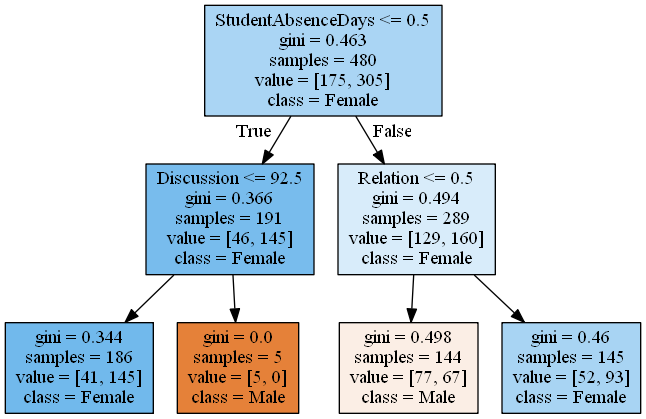

In [17]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
X = df.drop('gender',1)
Y = df['gender']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [18]:
start_time = timeit.default_timer()
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0)
X = df.drop('gender',1)
Y = df['gender']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.9133851322440023 seconds. ---


# Criterion: Entropy (Information Gain)

In [19]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    X = df.drop('gender',1)
    Y = df['gender']
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 61.51%.

Depth: 2
Model Performance: 54.73%.

Depth: 3
Model Performance: 57.45%.

Depth: 4
Model Performance: 59.97%.

Depth: 5
Model Performance: 57.50%.

Depth: 6
Model Performance: 59.18%.

Depth: 7
Model Performance: 59.82%.

Depth: 8
Model Performance: 61.69%.

Depth: 9
Model Performance: 55.90%.

Depth: 10
Model Performance: 57.99%.

--- Runtime: 18.030717500655328 seconds. ---


# Best-Performing Tree: max_depth = 2

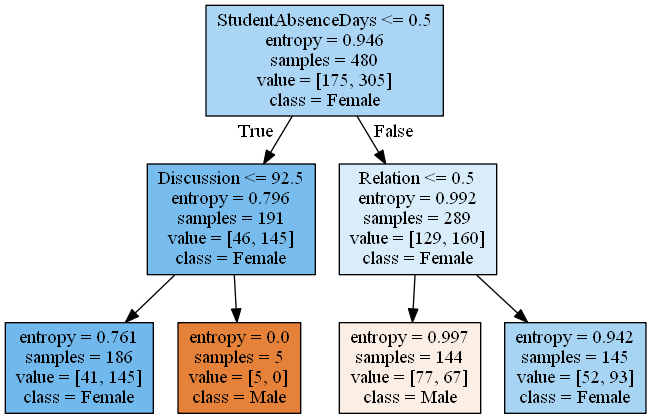

In [20]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = df.drop('gender',1)
Y = df['gender']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
start_time = timeit.default_timer()

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = df.drop('gender',1)
Y = df['gender']
decision_tree.fit(X,Y)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.45899307611102813 seconds. ---


# Random Forest Model

In [22]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X, Y)
names_importances = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])

In [23]:
names_importances_desc

,feature,importance
0,VisITedResources,0.241942
1,Discussion,0.234386
2,raisedhands,0.230259
3,AnnouncementsView,0.200399
4,Relation,0.048578
5,StudentAbsenceDays,0.044437


In [24]:
start_time = timeit.default_timer()

X_prime = X[['Relation','raisedhands','VisITedResources','AnnouncementsView','Discussion', 'StudentAbsenceDays']]
features = list(X_prime.columns)

for i in range(len(features),0,-1): 
    X = X[features[:i+1]]
    print('Run Number: {}.\n'.format(len(features)-i+1))
    print('Number of Features: {}.\n'.format(i))
    print('Dropped Feature(s): \n{}\n'.format(features[i:]))
    print("Model Performance: {:.2%}.\n".format(cross_val_score(rfc, X_prime, Y, cv=10).mean()))
    
print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Run Number: 1.

Number of Features: 6.

Dropped Feature(s): 
[]

Model Performance: 58.77%.

Run Number: 2.

Number of Features: 5.

Dropped Feature(s): 
['StudentAbsenceDays']

Model Performance: 59.18%.

Run Number: 3.

Number of Features: 4.

Dropped Feature(s): 
['Discussion', 'StudentAbsenceDays']

Model Performance: 60.83%.

Run Number: 4.

Number of Features: 3.

Dropped Feature(s): 
['AnnouncementsView', 'Discussion', 'StudentAbsenceDays']

Model Performance: 60.87%.

Run Number: 5.

Number of Features: 2.

Dropped Feature(s): 
['VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']

Model Performance: 59.85%.

Run Number: 6.

Number of Features: 1.

Dropped Feature(s): 
['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']

Model Performance: 60.87%.

--- Runtime: 2.0385628243327574 seconds. ---


# sklearn Recursive Feature Elimination With Cross-Validation

In [25]:
def iterative_RFC(X,Y):
    start_time = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier()
    rfecv = RFECV(estimator=rfc, step=1, cv=10, scoring='accuracy')
    rfecv.fit(X, Y)
    print("Optimal Number of Features: {}.".format(rfecv.n_features_))
    print("Model Performance: {:.2%}.".format(rfecv.grid_scores_.mean()))
    print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

In [27]:
X=X
Y=Y
iterative_RFC(X,Y)

Optimal Number of Features: 2.
Model Performance: 57.85%.
--- Runtime: 0.6585641125366237 seconds. ---


The Random Forest model takes longer time than the Decision Tree models.